# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from collections import Counter

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv',nrows=70000)
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (70000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [6]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## preprocessing of project_grade_category

In [9]:
project_grade_category = list(project_data['project_grade_category'].values)

project_grade_category_list = []

for grade in project_grade_category:
    grade = grade.lower()
    grade_replace = grade.replace(' ', '_')
    grade_final_replace = grade_replace.replace('-', '_')
    
    project_grade_category_list.append(grade_final_replace)
    
# Now replace the "school_state" column by the cleaned one.
project_data['clean_project_grade_category'] = project_grade_category_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [10]:
clean_project_grade_category = list(project_data['clean_project_grade_category'].values)
print(list(set(clean_project_grade_category)))

['grades_prek_2', 'grades_9_12', 'grades_6_8', 'grades_3_5']


## preprocessing of teacher_prefix

In [11]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].apply(lambda x: np.str_(x))

In [12]:
teacher_prefix = list(project_data['teacher_prefix'].values)

teacher_prefix_list = []

for prefix in teacher_prefix:
    prefix = prefix.replace('.','')
    teacher_prefix_list.append(prefix.lower())

# Now replace the "teacher_prefix" column by the cleaned one.
project_data['clean_teacher_prefix'] = teacher_prefix_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)

In [13]:
clean_teacher_prefix = list(project_data['clean_teacher_prefix'].values)
print(list(set(clean_teacher_prefix)))

['mrs', 'teacher', 'ms', 'mr', 'dr', 'nan']


## 1.3 Text preprocessing

In [14]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [15]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_project_grade_category,clean_teacher_prefix,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,154.6,23,Literacy_Language,ESL Literacy,grades_prek_2,mrs,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,299.0,1,History_Civics Health_Sports,Civics_Government TeamSports,grades_6_8,mr,Our students arrive to our school eager to lea...


In [16]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [17]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [18]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [19]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [20]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [21]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [22]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.lower().split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 70000/70000 [00:42<00:00, 1654.53it/s]


In [23]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

## Number of Words in Essay

In [24]:
word_count_essay=[]
for count in project_data['essay']:
    lenth=len(count.split())
    word_count_essay.append(lenth)
project_data['Essay_length']=word_count_essay
project_data.head(5)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,...,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_project_grade_category,clean_teacher_prefix,essay,Essay_length
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,...,0,0,154.60,23,Literacy_Language,ESL Literacy,grades_prek_2,mrs,My students are English learners that are work...,272
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,...,7,1,299.00,1,History_Civics Health_Sports,Civics_Government TeamSports,grades_6_8,mr,Our students arrive to our school eager to lea...,221
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,AZ,2016-08-31 12:03:56,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,...,1,0,516.85,22,Health_Sports,Health_Wellness TeamSports,grades_6_8,ms,"\r\n\""True champions aren't always the ones th...",361
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,KY,2016-10-06 21:16:17,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,...,4,1,232.90,4,Literacy_Language Math_Science,Literacy Mathematics,grades_prek_2,mrs,I work at a unique school filled with both ESL...,213
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,TX,2016-07-11 01:10:09,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,...,1,1,67.98,4,Math_Science,Mathematics,grades_prek_2,mrs,Our second grade classroom next year will be m...,234


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [25]:
# similarly you can preprocess the titles also
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[29999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Bodies in Motion Learn!


In [26]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.lower().split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 70000/70000 [00:02<00:00, 32478.76it/s]


In [27]:
# after preprocesing
print(preprocessed_project_title[0])
print("="*50)
print(preprocessed_project_title[50])
print("="*50)
print(preprocessed_project_title[10000])
print("="*50)

educational support english learners home
active energized
family book clubs


## Number of Words in Title

In [28]:
count_word_title=[]
for count in project_data['project_title']:
    total=len(count.split())
    count_word_title.append(total)
    
project_data['Title_word_count']=count_word_title
project_data.head(5)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,...,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_project_grade_category,clean_teacher_prefix,essay,Essay_length,Title_word_count
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,...,0,154.60,23,Literacy_Language,ESL Literacy,grades_prek_2,mrs,My students are English learners that are work...,272,7
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,...,1,299.00,1,History_Civics Health_Sports,Civics_Government TeamSports,grades_6_8,mr,Our students arrive to our school eager to lea...,221,5
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,AZ,2016-08-31 12:03:56,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,...,0,516.85,22,Health_Sports,Health_Wellness TeamSports,grades_6_8,ms,"\r\n\""True champions aren't always the ones th...",361,7
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,KY,2016-10-06 21:16:17,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,...,1,232.90,4,Literacy_Language Math_Science,Literacy Mathematics,grades_prek_2,mrs,I work at a unique school filled with both ESL...,213,2
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,TX,2016-07-11 01:10:09,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,...,1,67.98,4,Math_Science,Mathematics,grades_prek_2,mrs,Our second grade classroom next year will be m...,234,3


## Sentiment Scores for the essays

In [29]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

positive = []
negative = []
neutral = []
compound = []

for pol in project_data["essay"] :
    p = analyser.polarity_scores(pol)['pos']
    n = analyser.polarity_scores(pol)['neg']
    o = analyser.polarity_scores(pol)['neu']
    c = analyser.polarity_scores(pol)['compound']
    positive.append(p)
    negative.append(n)
    neutral.append(o)
    compound.append(c)



In [30]:
project_data['pos']= positive
project_data['neg']= negative
project_data['neu']= neutral
project_data['compound']= compound
project_data.head(5)

,Unnamed: 0,id,teacher_id,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,...,clean_subcategories,clean_project_grade_category,clean_teacher_prefix,essay,Essay_length,Title_word_count,pos,neg,neu,compound
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,...,ESL Literacy,grades_prek_2,mrs,My students are English learners that are work...,272,7,0.081,0.008,0.911,0.9611
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,...,Civics_Government TeamSports,grades_6_8,mr,Our students arrive to our school eager to lea...,221,5,0.112,0.037,0.851,0.9267
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,AZ,2016-08-31 12:03:56,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,...,Health_Wellness TeamSports,grades_6_8,ms,"\r\n\""True champions aren't always the ones th...",361,7,0.179,0.058,0.764,0.9950
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,KY,2016-10-06 21:16:17,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,...,Literacy Mathematics,grades_prek_2,mrs,I work at a unique school filled with both ESL...,213,2,0.214,0.052,0.733,0.9931
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,TX,2016-07-11 01:10:09,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,...,Mathematics,grades_prek_2,mrs,Our second grade classroom next year will be m...,234,3,0.087,0.016,0.897,0.9192


## 1.5 Preparing data for models

In [31]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'clean_project_grade_category', 'clean_teacher_prefix', 'essay',
       'Essay_length', 'Title_word_count', 'pos', 'neg', 'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [32]:
#Concatinating essay text with project title
project_data['essay_title'] = project_data['essay'] + " " + project_data['project_title']
#calculating number of words for combine essay and title
essay_title_word_count = []
for essay_title in project_data.essay_title.tolist():
    essay_title_word_count.append(len(essay_title.split()))
project_data['essay_title_word_count'] = essay_title_word_count

## Train/Test Split and Cross Validation

In [33]:
#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# create training and testing vars
X=project_data
Y=project_data['project_is_approved']
project_data.drop(['project_is_approved'], axis = 1, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, stratify = Y )
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.30, stratify=Y_train)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
print(X_cv.shape, Y_cv.shape)

(34300, 27) (34300,)
(21000, 27) (21000,)
(14700, 27) (14700,)


# 1.5.2 Vectorizing Numerical features

##  PRICE

In [36]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [37]:
from sklearn.preprocessing import Normalizer
normalizer_price = Normalizer()
normalizer_price.fit(X_train['price'].values.reshape(1,-1))
X_train_price = normalizer_price.fit_transform(X_train['price'].values.reshape(1,-1).transpose())
X_cv_price = normalizer_price.transform(X_cv['price'].values.reshape(1,-1).transpose())
X_test_price = normalizer_price.transform(X_test['price'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_price.shape, Y_train.shape)
print(X_cv_price.shape, Y_cv.shape)
print(X_test_price.shape, Y_test.shape)


After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## teacher_number_of_previously_posted_projects

In [38]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_train_prev_project_norm =normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_cv_prev_project_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_test_prev_project_norm =normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_prev_project_norm.shape, Y_train.shape)
print(X_cv_prev_project_norm.shape, Y_cv.shape)
print(X_test_prev_project_norm.shape, Y_test.shape)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## Quantity

In [39]:
normalizer = Normalizer()
normalizer.fit(X_train['quantity'].values.reshape(1,-1).transpose())
X_train_quantity_nm = normalizer.fit_transform(X_train['quantity'].values.reshape(1,-1).transpose())
X_cv_quantity_nm = normalizer.transform(X_cv['quantity'].values.reshape(1,-1).transpose())
X_test_quantity_nm = normalizer.transform(X_test['quantity'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_quantity_nm.shape, Y_train.shape)
print(X_cv_quantity_nm.shape, Y_cv.shape)
print(X_test_quantity_nm.shape, Y_test.shape)


After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## Title word Count

In [40]:
normalizer = Normalizer()

normalizer.fit(X_train['Title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer.transform(X_train['Title_word_count'].values.reshape(1,-1).transpose())
title_word_count_cv = normalizer.transform(X_cv['Title_word_count'].values.reshape(1,-1).transpose())
title_word_count_test = normalizer.transform(X_test['Title_word_count'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(title_word_count_train.shape, Y_train.shape)
print(title_word_count_cv.shape, Y_cv.shape)
print(title_word_count_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## Essay word Count

In [41]:
normalizer = Normalizer()

normalizer.fit(X_train['Essay_length'].values.reshape(-1,1))

essay_word_count_train = normalizer.transform(X_train['Essay_length'].values.reshape(1,-1).transpose())
essay_word_count_cv = normalizer.transform(X_cv['Essay_length'].values.reshape(1,-1).transpose())
essay_word_count_test = normalizer.transform(X_test['Essay_length'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(essay_word_count_train.shape, Y_train.shape)
print(essay_word_count_cv.shape, Y_cv.shape)
print(essay_word_count_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## Essay Sentiments - pos

In [42]:
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(-1,1))

essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(1,-1).transpose())
essay_sent_pos_cv = normalizer.transform(X_cv['pos'].values.reshape(1,-1).transpose())
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(essay_sent_pos_train.shape, Y_train.shape)
print(essay_sent_pos_cv.shape, Y_cv.shape)
print(essay_sent_pos_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## Essay Sentiments - neg

In [43]:
normalizer = Normalizer()

normalizer.fit(X_train['neg'].values.reshape(-1,1))

essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(1,-1).transpose())
essay_sent_neg_cv = normalizer.transform(X_cv['neg'].values.reshape(1,-1).transpose())
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(essay_sent_neg_train.shape, Y_train.shape)
print(essay_sent_neg_cv.shape, Y_cv.shape)
print(essay_sent_neg_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## Essay Sentiments - neu

In [44]:
normalizer = Normalizer()

normalizer.fit(X_train['neu'].values.reshape(-1,1))

essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(1,-1).transpose())
essay_sent_neu_cv = normalizer.transform(X_cv['neu'].values.reshape(1,-1).transpose())
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(1,-1).transpose())

print("After vectorizations")
print(essay_sent_neu_train.shape, Y_train.shape)
print(essay_sent_neu_cv.shape, Y_cv.shape)
print(essay_sent_neu_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## Essay Sentiments - compound

In [45]:
normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(-1,1))

essay_sent_comp_train = normalizer.transform(X_train['compound'].values.reshape(1,-1).transpose())
essay_sent_comp_cv = normalizer.transform(X_cv['compound'].values.reshape(1,-1).transpose())
essay_sent_comp_test = normalizer.transform(X_test['compound'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(essay_sent_comp_train.shape, Y_train.shape)
print(essay_sent_comp_cv.shape, Y_cv.shape)
print(essay_sent_comp_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## Combine essay and title word count

In [46]:
normalizer = Normalizer()
normalizer.fit(X_train['essay_title_word_count'].values.reshape(1,-1))
X_train_essay_title_word_count_nm =normalizer.fit_transform(X_train['essay_title_word_count'].values.reshape(1,-1).transpose())
X_cv_essay_title_word_count_nm = normalizer.transform(X_cv['essay_title_word_count'].values.reshape(1,-1).transpose())
X_test_essay_title_word_count_nm = normalizer.transform(X_test['essay_title_word_count'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_essay_title_word_count_nm.shape, Y_train.shape)
print(X_cv_essay_title_word_count_nm.shape, Y_cv.shape)
print(X_test_essay_title_word_count_nm.shape, Y_test.shape)

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


# Assignment 11: TruncatedSVD

- <font color='red'>step 1</font> Select the top 2k words from essay text and project_title (concatinate essay text with project title and then find the top 2k words) based on their <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>`idf_`</a> values 
- <font color='red'>step 2</font> Compute the co-occurance matrix with these 2k words, with window size=5 (<a href='https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/'>ref</a>)
    <img src='cooc.JPG' width=300px>
- <font color='red'>step 3</font> Use <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on calculated co-occurance matrix and reduce its dimensions, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a>
 >- The shape of the matrix after TruncatedSVD will be 2000\*n, i.e. each row represents a vector form of the corresponding word. <br>
 >- Vectorize the essay text and project titles using these word vectors. (while vectorizing, do ignore all the words which are not in top 2k words)
- <font color='red'>step 4</font> Concatenate these truncatedSVD matrix, with the matrix with features
<ul>
    <li><strong>school_state</strong> : categorical data</li>
    <li><strong>clean_categories</strong> : categorical data</li>
    <li><strong>clean_subcategories</strong> : categorical data</li>
    <li><strong>project_grade_category</strong> :categorical data</li>
    <li><strong>teacher_prefix</strong> : categorical data</li>
    <li><strong>quantity</strong> : numerical data</li>
    <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
    <li><strong>price</strong> : numerical data</li>
    <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
    <li><strong>number of words in the title</strong> : numerical data</li>
    <li><strong>number of words in the combine essays</strong> : numerical data</li>
    <li><strong>word vectors calculated in</strong> <font color='red'>step 3</font> : numerical data</li>
</ul>
- <font color='red'>step 5</font>: Apply GBDT on matrix that was formed in <font color='red'>step 4</font> of this assignment, <font color='blue'><strong>DO REFER THIS BLOG: <a href='https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html'>XGBOOST DMATRIX<strong></a></font>
<li><font color='red'>step 6</font>:Hyper parameter tuning (Consider any two hyper parameters)<ul><li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>



In [47]:
'''import sys
import math
 
import numpy as np
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import roc_auc_score

# you might need to install this one
import xgboost as xgb

class XGBoostClassifier():
    def __init__(self, num_boost_round=10, **params):
        self.clf = None
        self.num_boost_round = num_boost_round
        self.params = params
        self.params.update({'objective': 'multi:softprob'})
 
    def fit(self, X, y, num_boost_round=None):
        num_boost_round = num_boost_round or self.num_boost_round
        self.label2num = {label: i for i, label in enumerate(sorted(set(y)))}
        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])
        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round, verbose_eval=1)
 
    def predict(self, X):
        num2label = {i: label for label, i in self.label2num.items()}
        Y = self.predict_proba(X)
        y = np.argmax(Y, axis=1)
        return np.array([num2label[i] for i in y])
 
    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        return self.clf.predict(dtest)
 
    def score(self, X, y):
        Y = self.predict_proba(X)[:,1]
        return roc_auc_score(y, Y)
 
    def get_params(self, deep=True):
        return self.params
 
    def set_params(self, **params):
        if 'num_boost_round' in params:
            self.num_boost_round = params.pop('num_boost_round')
        if 'objective' in params:
            del params['objective']
        self.params.update(params)
        return self
    

clf = XGBoostClassifier(eval_metric = 'auc', num_class = 2, nthread = 4,)
###################################################################
#               Change from here                                  #
###################################################################
parameters = {
    'num_boost_round': [100, 250, 500],
    'eta': [0.05, 0.1, 0.3],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}

clf = GridSearchCV(clf, parameters)
X = np.array([[1,2], [3,4], [2,1], [4,3], [1,0], [4,5]])
Y = np.array([0, 1, 0, 1, 0, 1])
clf.fit(X, Y)

#print(clf.grid_scores_)
best_parameters, score, _ = max(clf.cv_results_, key=lambda x: x[1]).split(",")
print('score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))'''

'import sys\nimport math\n \nimport numpy as np\n#from sklearn.grid_search import GridSearchCV\nfrom sklearn.model_selection import learning_curve, GridSearchCV\nfrom sklearn.metrics import roc_auc_score\n\n# you might need to install this one\nimport xgboost as xgb\n\nclass XGBoostClassifier():\n    def __init__(self, num_boost_round=10, **params):\n        self.clf = None\n        self.num_boost_round = num_boost_round\n        self.params = params\n        self.params.update({\'objective\': \'multi:softprob\'})\n \n    def fit(self, X, y, num_boost_round=None):\n        num_boost_round = num_boost_round or self.num_boost_round\n        self.label2num = {label: i for i, label in enumerate(sorted(set(y)))}\n        dtrain = xgb.DMatrix(X, label=[self.label2num[label] for label in y])\n        self.clf = xgb.train(params=self.params, dtrain=dtrain, num_boost_round=num_boost_round, verbose_eval=1)\n \n    def predict(self, X):\n        num2label = {i: label for label, i in self.label2nu

<h1>2. TruncatedSVD </h1>

<h2>2.1 Selecting top 2000 words from `essay` and `project_title`</h2>

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, max_features=5000)
X_train_essay_title = vectorizer.fit_transform(X_train['essay_title'])

In [49]:
tf = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_words = [features[i] for i in tf[:2000]]

<h2>2.2 Computing Co-occurance matrix</h2>

In [50]:
def COmatrix( data, words, cw=5 ):
    
    cm = pd.DataFrame( np.zeros((len(words), len(words))), index=words, columns=words )
    
    for sent in data['essay_title']:
        
        word = sent.split()
        
        for ind in range( len(word) ):
            
            if cm.get( word[ind] ) is None:
                continue
                
            for i in range(1, cw + 1 ):
                
                if ind - i >= 0:
                    if cm.get( word[ind - i] ) is not None:
                        
                        cm[ word[ind-i]].loc[word[ind]] =  (cm.get( word[ind-i] ).loc[ word[ind] ] + 1) 
                        cm[word[ind]].loc[ word[ind-i] ] = (cm.get( word[ind] ).loc[ word[ind-i] ] + 1) 
                
                if ind + i < len(word):
                    if cm.get( word[ind+i] ) is not None:
                        
                        cm[ word[ind+i]].loc[word[ind]] =  (cm.get( word[ind+i] ).loc[ word[ind] ] + 1)                     
                        cm[word[ind]].loc[ word[ind+i] ] = (cm.get( word[ind] ).loc[ word[ind+i] ] + 1) 
                        
    
    np.fill_diagonal( cm.values, 0 )
    cm = cm.div(2)
    
    return cm

In [51]:
# Taking Sample Data, Just to check

import pandas as pd
import numpy as np

li = ['abc def ijk pqr', 'pqr klm opq', 'lmn pqr xyz abc def pqr abc']

df = pd.DataFrame()
df['essay_title'] = li
df.head()

,essay_title
0,abc def ijk pqr
1,pqr klm opq
2,lmn pqr xyz abc def pqr abc


In [52]:
tf = ['abc','pqr', 'def']
c = COmatrix( df, tf, 2 )
c

,abc,pqr,def
abc,0.0,3.0,3.0
pqr,3.0,0.0,2.0
def,3.0,2.0,0.0


In [53]:
cmtr = COmatrix( X_train, top_words )

In [54]:
cmtr.shape

(2000, 2000)

In [55]:
cmtr.head(3)

,archery,alexa,german,wrestling,dell,golf,reeds,drones,oils,calculus,...,nyou,tutoring,franklin,experts,checking,globe,wrong,disadvantages,ample,philosophy
archery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alexa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
german,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
cmtr[ cmtr['archery'] > 0.0 ]

,archery,alexa,german,wrestling,dell,golf,reeds,drones,oils,calculus,...,nyou,tutoring,franklin,experts,checking,globe,wrong,disadvantages,ample,philosophy
trained,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
farther,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
targets,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
certified,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
cmtr[ cmtr != 0 ].cumsum(axis=1).min(axis=1)[:10]

archery      2.0
alexa        NaN
german       NaN
wrestling    1.0
dell         NaN
golf         1.0
reeds        1.0
drones       1.0
oils         1.0
calculus     1.0
dtype: float64

In [58]:
co = pd.DataFrame(columns=['row', 'col','co-occurence'])

r = []
c = []
coo = []

count = 0

for i in tqdm(cmtr.index):
    for j in cmtr.index:
        
        if cmtr.loc[j][i] != 0:
    
            r.append(j) 
            c.append(i) 
            coo.append( cmtr.loc[j][i] )
            
            count += 1
            
        if count == 10:
            break

co['row'] = r
co['col'] = c
co['co-occurence'] = coo


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [05:13<00:00,  6.37it/s]


In [59]:
co.head()

,row,col,co-occurence
0,trained,archery,2.0
1,farther,archery,1.0
2,targets,archery,3.0
3,certified,archery,2.0
4,rebuild,wrestling,1.0


<h2>2.3 Applying TruncatedSVD and Calculating Vectors for `essay` and `project_title`</h2>

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.95s/it]


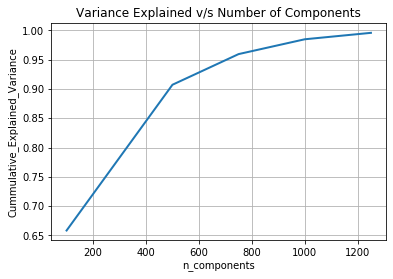

In [60]:
from tqdm import tqdm
from sklearn.decomposition import TruncatedSVD
n_components = [100, 500, 750, 1000, 1250]
variance_explained = []
for i in tqdm(n_components):
    svd = TruncatedSVD(n_components= i)
    svd.fit_transform(cmtr)
    variance_explained.append(svd.explained_variance_ratio_.sum())
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummulative_Explained_Variance")
plt.title("Variance Explained v/s Number of Components")
plt.plot(n_components, variance_explained,lw=2)
plt.show()

In [61]:
svd = TruncatedSVD(700)
svd.fit(cmtr)
X_svd_train = svd.transform(cmtr)
X_svd_cv = svd.transform(cmtr)
X_svd_test = svd.transform(cmtr)
print("Train matrix shape after applying TruncatedSVD:", X_svd_train.shape)
print("CV matrix shape after applying TruncatedSVD:", X_svd_cv.shape)
print("Test matrix shape after applying TruncatedSVD:", X_svd_test.shape)

Train matrix shape after applying TruncatedSVD: (2000, 700)
CV matrix shape after applying TruncatedSVD: (2000, 700)
Test matrix shape after applying TruncatedSVD: (2000, 700)


## Word vectors for train data

In [62]:
train_word_vectors = np.zeros((X_train.shape[0],700))
idx = 0
for sentence in(X_train.essay_title.tolist()):
    zero_vector = np.zeros((1, 700))
    word_count = 0
    for word in sentence.split():
        if word in top_words:
            zero_vector += X_svd_train[top_words.index(word)]
            word_count += 1
    if word_count != 0:
        zero_vector /= word_count
    train_word_vectors[idx] = zero_vector
    idx += 1

## Word vectors for cross validation data

In [63]:
cv_word_vectors = np.zeros((X_cv.shape[0],700))
idx = 0
for sentence in (X_train.essay_title.tolist()):
    zero_vector = np.zeros((1, 700))
    word_count = 0
    for word in sentence.split():
        if word in top_words:
            zero_vector += X_svd_train[top_words.index(word)]
            word_count += 1
    if word_count != 0:
        zero_vector /= word_count
    train_word_vectors[idx] = zero_vector
    idx += 1

## Word vectors for test data

In [64]:
test_word_vectors = np.zeros((X_test.shape[0],700))
idx = 0
for sentence in (X_train.essay_title.tolist()):
    zero_vector = np.zeros((1, 700))
    word_count = 0
    for word in sentence.split():
        if word in top_words:
            zero_vector += X_svd_train[top_words.index(word)]
            word_count += 1
    if word_count != 0:
        zero_vector /= word_count
    train_word_vectors[idx] = zero_vector
    idx += 1

<h2>2.4 Merge the features from <font color='red'>step 3</font> and <font color='red'>step 4</font></h2>

## Encoding numerical, categorical features

In [65]:
def get_cat_fea_dict(alpha, feature, df):
    value_count = df[feature].value_counts()
    cat_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(0,2):
            cls_cnt = df.loc[(df['project_is_approved']==k) & (df[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))
        cat_dict[i]=vec
    return cat_dict

def get_cat_feature(alpha, feature, df):
    cat_dict = get_cat_fea_dict(alpha, feature, df)
    value_count = df[feature].value_counts()
    cat_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            cat_fea.append(cat_dict[row[feature]])
        else:
            cat_fea.append([0.5, 0.5])
    return cat_fea

In [66]:
train_df = pd.merge(X_train, Y_train.to_frame(), left_index=True, right_index=True, how='left')
X_train_project_grade_category = get_cat_feature(1, 'clean_project_grade_category', train_df)
X_train_clean_categories = get_cat_feature(1, 'clean_categories', train_df)
X_train_teacher_prefix = get_cat_feature(1, 'clean_teacher_prefix', train_df)
X_train_school_state = get_cat_feature(1, 'school_state', train_df)
X_train_clean_subcategories = get_cat_feature(1, 'clean_subcategories', train_df)

print("After vectorizations")
print(len(X_train_project_grade_category), Y_train.shape)
print(len(X_train_clean_categories), Y_train.shape)
print(len(X_train_teacher_prefix), Y_train.shape)
print(len(X_train_school_state), Y_train.shape)
print(len(X_train_clean_subcategories), Y_train.shape)

After vectorizations
34300 (34300,)
34300 (34300,)
34300 (34300,)
34300 (34300,)
34300 (34300,)


In [67]:
cv_df = pd.merge(X_cv, Y_cv.to_frame(), left_index=True, right_index=True, how='left')
cv_df = pd.merge(X_cv, Y_cv.to_frame(), left_index=True, right_index=True, how='left')
X_cv_project_grade_category = get_cat_feature(1, 'clean_project_grade_category', cv_df)
X_cv_clean_categories = get_cat_feature(1, 'clean_categories', cv_df)
X_cv_teacher_prefix = get_cat_feature(1, 'clean_teacher_prefix', cv_df)
X_cv_school_state = get_cat_feature(1, 'school_state', cv_df)
X_cv_clean_subcategories = get_cat_feature(1, 'clean_subcategories', cv_df)

print("After vectorizations")
print(len(X_cv_project_grade_category), Y_cv.shape)
print(len(X_cv_clean_categories), Y_cv.shape)
print(len(X_cv_teacher_prefix), Y_cv.shape)
print(len(X_cv_school_state), Y_cv.shape)
print(len(X_cv_clean_subcategories), Y_cv.shape)

After vectorizations
14700 (14700,)
14700 (14700,)
14700 (14700,)
14700 (14700,)
14700 (14700,)


In [68]:
test_df = pd.merge(X_test, Y_test.to_frame(), left_index=True, right_index=True, how='left')
X_test_project_grade_category = get_cat_feature(1, 'clean_project_grade_category', test_df)
X_test_clean_categories = get_cat_feature(1, 'clean_categories', test_df)
X_test_teacher_prefix = get_cat_feature(1, 'clean_teacher_prefix', test_df)
X_test_school_state = get_cat_feature(1, 'school_state', test_df)
X_test_clean_subcategories = get_cat_feature(1, 'clean_subcategories', test_df)
print("After vectorizations")
print(len(X_test_project_grade_category), Y_test.shape)
print(len(X_test_clean_categories), Y_test.shape)
print(len(X_test_teacher_prefix), Y_test.shape)
print(len(X_test_school_state), Y_test.shape)
print(len(X_test_clean_subcategories), Y_test.shape)

After vectorizations
21000 (21000,)
21000 (21000,)
21000 (21000,)
21000 (21000,)
21000 (21000,)


<h2>2.5 Apply XGBoost on the Final Features from the above section</h2>

https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [69]:
from scipy.sparse import hstack
from scipy import sparse
train = hstack((X_train_price, X_train_prev_project_norm, X_train_quantity_nm,title_word_count_train,essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train,essay_sent_comp_train, X_train_essay_title_word_count_nm,X_train_project_grade_category, X_train_clean_categories, X_train_teacher_prefix,X_train_school_state,X_train_clean_subcategories, sparse.csr_matrix(train_word_vectors)))
cv = hstack((X_cv_price, X_cv_prev_project_norm, X_cv_quantity_nm,title_word_count_cv,essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv,essay_sent_comp_cv, X_cv_essay_title_word_count_nm,X_cv_project_grade_category, X_cv_clean_categories, X_cv_teacher_prefix,X_cv_school_state,X_cv_clean_subcategories, sparse.csr_matrix(cv_word_vectors)))
test = hstack((X_test_price, X_test_prev_project_norm, X_test_quantity_nm,title_word_count_test,essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test,essay_sent_comp_test, X_test_essay_title_word_count_nm,X_test_project_grade_category, X_test_clean_categories, X_test_teacher_prefix,X_test_school_state,X_test_clean_subcategories, sparse.csr_matrix(test_word_vectors)))
print('Final train data shape:', train.shape)
print('Final cv data shape:', cv.shape)
print('Final test data shape:', test.shape)

Final train data shape: (34300, 720)
Final cv data shape: (14700, 720)
Final test data shape: (21000, 720)


In [70]:
sparse.save_npz("train.npz", train)
sparse.save_npz("cv.npz", cv)
sparse.save_npz("test.npz", test)

## Apply XGBoost on the Final Features from the above section

In [71]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

max_depth = [5, 10, 15]
n_estimators = [10, 100, 500, 1000, 2000]
train_auc = list()
cv_auc = list()
for d in tqdm (max_depth):
    for estimator in n_estimators :
        clf =  XGBClassifier(max_depth = d, class_weight='balanced', n_estimators = estimator,n_jobs=-1)
        clf.fit(train,Y_train)
        
        Y_probs_tr = clf.predict(train)
        Y_probs_cv = clf.predict(cv)

        train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
        cv_auc.append(roc_auc_score(Y_cv, Y_probs_cv))

100%|██████████████████████████████████████████████████████████████████████████████| 3/3 [10:36:12<00:00, 12724.21s/it]


In [74]:
# https://plot.ly/python/3d-axes/

max_depth = [5, 10, 15]
n_estimators = [10, 100, 500, 1000]
trace1 = go.Scatter3d(x=n_estimators,y=max_depth,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=n_estimators,y=max_depth,z=cv_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

##  Finding The Best Hyperparameter "max_depth" and "n_estimators"

## Grid Search CV

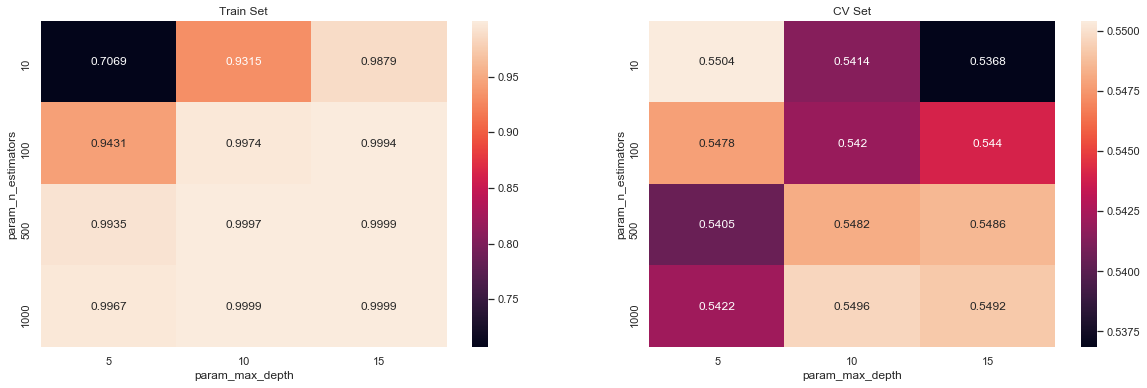

In [84]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dtc = XGBClassifier(min_samples_split=15)
parameters = {'n_estimators': [10, 100, 500, 1000], 'max_depth':[5, 10, 15] }
clf = GridSearchCV(dtc, parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(train, Y_train)
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [74]:
# https://plot.ly/python/3d-axes/

max_depth = [5, 10, 15]
n_estimators = [10, 100, 500, 1000]
trace1 = go.Scatter3d(x=n_estimators,y=max_depth,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=n_estimators,y=max_depth,z=cv_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [85]:
#Best estimator
print(clf.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf.score(train,Y_train))
print(clf.score(test,Y_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_split=15, missing=None,
              n_estimators=10, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)
0.6829616981408648
0.5321200838188472


In [86]:
# Best tune parameters
best_tune_parameters=[{'n_estimators': [20], 'max_depth':[5] } ]

## Testing the performance of the model on test data, plotting ROC Curves

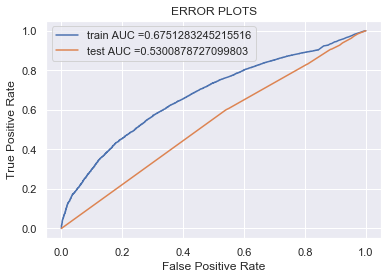

In [90]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf = GridSearchCV(RandomForestClassifier(class_weight='balanced'),best_tune_parameters)
clf.fit(train, Y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
Y_train_pred = clf.predict_proba(train) [:,1]
Y_test_pred = clf.predict_proba(test) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, Y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, Y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

## Train Confusion Matrix

In [88]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.4 for threshold 0.51
the maximum value of tpr*(1-fpr) 0.27 for threshold 0.43


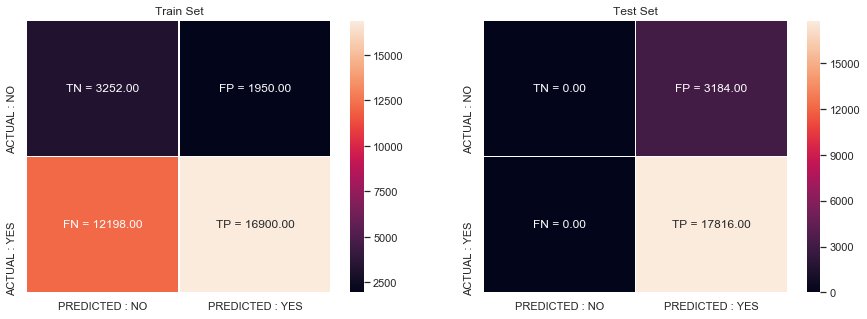

In [89]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(Y_train, predict(Y_probs_train, train_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(Y_test, predict(Y_probs_test, test_thresholds, test_fpr, test_tpr))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

<h1>3. Conclusion</h1>

In [92]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Hyperparameters(no.of.estimator, max-depth)", "Train AUC", "Test AUC"]

x.add_row(["XGBoost (with hyperparameter tuning)", "(20, 5)", 0.675, 0.530])
print(x)

+--------------------------------------+---------------------------------------------+-----------+----------+
|                Model                 | Hyperparameters(no.of.estimator, max-depth) | Train AUC | Test AUC |
+--------------------------------------+---------------------------------------------+-----------+----------+
| XGBoost (with hyperparameter tuning) |                   (20, 5)                   |   0.675   |   0.53   |
+--------------------------------------+---------------------------------------------+-----------+----------+
